In [769]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from sklearn.linear_model import LinearRegression

In [770]:
df = pd.read_csv("https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_forecasts.csv")
df

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
0,2022-11-30 21:00:41 UTC,Brazil,G,93.48139,3.06210,0.23656,2.81069,0.15361,0.03570,4.93864,...,0.99587,0.00413,0.00000,0.00000,1.00000,0.82327,0.53576,0.37368,0.24769,2022-11-30 21:01:48 UTC
1,2022-11-30 21:00:41 UTC,Spain,E,90.62031,2.84092,0.33577,1.61182,1.24899,0.13919,8.04129,...,0.84834,0.14309,0.00857,0.00000,0.99143,0.72387,0.35347,0.22265,0.13230,2022-11-30 21:01:48 UTC
2,2022-11-30 21:00:41 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,0.82636,0.51400,0.21433,0.11649,2022-11-30 21:01:48 UTC
3,2022-11-30 21:00:41 UTC,France,D,88.57378,2.83760,0.46033,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,0.81285,0.46033,0.25141,0.11311,2022-11-30 21:01:48 UTC
4,2022-11-30 21:00:41 UTC,England,B,86.96946,2.62701,0.44455,2.00000,1.00000,0.00000,7.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,0.68077,0.36638,0.19420,0.08616,2022-11-30 21:01:48 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2022-11-16 16:00:55 UTC,Saudi Arabia,C,56.86592,1.50018,0.99118,0.59721,0.79021,1.61258,-2.26444,...,0.06973,0.17476,0.29436,0.46115,0.24449,0.06913,0.02164,0.00516,0.00132,2022-11-30 21:01:48 UTC
124,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.05911,0.15706,0.30240,0.48143,0.21617,0.06500,0.02062,0.00454,0.00124,2022-11-30 21:01:48 UTC
125,2022-11-16 16:00:55 UTC,Qatar,A,51.00223,1.57111,1.31642,0.56555,0.68681,1.74764,-2.95133,...,0.06806,0.14850,0.25634,0.52710,0.21656,0.06588,0.01840,0.00399,0.00096,2022-11-30 21:01:48 UTC
126,2022-11-16 16:00:55 UTC,Ghana,H,58.62702,1.43347,0.85806,0.46730,0.80877,1.72393,-2.74111,...,0.04662,0.13341,0.28475,0.53522,0.18003,0.03586,0.00945,0.00284,0.00063,2022-11-30 21:01:48 UTC


In [771]:
dfteam = df.sort_values("team")
dfteam1 = dfteam.drop_duplicates(subset="team", keep = "first")
dfteam1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
2,2022-11-30 21:00:41 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,0.82636,0.51400,0.21433,0.11649,2022-11-30 21:01:48 UTC
124,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.05911,0.15706,0.30240,0.48143,0.21617,0.06500,0.02062,0.00454,0.00124,2022-11-30 21:01:48 UTC
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.54059,0.23882,0.17162,0.04897,0.77941,0.34298,0.14180,0.06427,0.02415,2022-11-30 21:01:48 UTC
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.85231,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-11-30 21:01:48 UTC
92,2022-11-24 20:56:17 UTC,Cameroon,G,63.62287,1.59463,0.79825,0.28323,0.45682,2.25995,-3.34378,...,0.00441,0.04494,0.28390,0.66675,0.04935,0.01582,0.00554,0.00210,0.00061,2022-11-30 21:01:48 UTC
88,2022-11-24 20:56:17 UTC,Canada,F,73.84345,2.02414,0.70416,0.61657,0.61764,1.76579,-1.30683,...,0.05813,0.20035,0.25522,0.48630,0.25848,0.08643,0.02833,0.01199,0.00427,2022-11-30 21:01:48 UTC
95,2022-11-24 20:56:17 UTC,Costa Rica,E,51.99243,1.32127,1.02265,0.20353,0.38891,2.40756,-10.08883,...,0.00118,0.02266,0.06748,0.90868,0.02384,0.00506,0.00097,0.00018,0.00002,2022-11-30 21:01:48 UTC
75,2022-11-24 20:56:17 UTC,Croatia,F,78.46106,2.16026,0.59205,0.75833,1.58667,0.65500,0.21102,...,0.22433,0.29180,0.27318,0.21069,0.51613,0.21130,0.08519,0.04148,0.01684,2022-11-30 21:01:48 UTC
73,2022-11-24 20:56:17 UTC,Denmark,D,78.86992,2.17826,0.58510,0.76562,1.54234,0.69204,0.15956,...,0.15307,0.41237,0.29935,0.13521,0.56544,0.32475,0.15557,0.05583,0.02290,2022-11-30 21:01:48 UTC
41,2022-11-28 20:59:50 UTC,Ecuador,A,75.81562,1.93859,0.56118,1.36865,1.33448,0.29687,2.13904,...,0.17704,0.53220,0.29076,0.00000,0.70924,0.31610,0.12525,0.04497,0.01607,2022-11-30 21:01:48 UTC


In [772]:
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored"]], dfteam1["win_league"])
dfteam1["predict_results"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored"]])
dfteam1

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4544\1581413943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfteam1["predict_results"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored"]])


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2022-11-30 21:00:41 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,0.00000,1.00000,0.82636,0.51400,0.21433,0.11649,2022-11-30 21:01:48 UTC,0.083638
124,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.15706,0.30240,0.48143,0.21617,0.06500,0.02062,0.00454,0.00124,2022-11-30 21:01:48 UTC,-0.005700
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.23882,0.17162,0.04897,0.77941,0.34298,0.14180,0.06427,0.02415,2022-11-30 21:01:48 UTC,0.058560
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-11-30 21:01:48 UTC,0.109779
92,2022-11-24 20:56:17 UTC,Cameroon,G,63.62287,1.59463,0.79825,0.28323,0.45682,2.25995,-3.34378,...,0.04494,0.28390,0.66675,0.04935,0.01582,0.00554,0.00210,0.00061,2022-11-30 21:01:48 UTC,-0.018308
88,2022-11-24 20:56:17 UTC,Canada,F,73.84345,2.02414,0.70416,0.61657,0.61764,1.76579,-1.30683,...,0.20035,0.25522,0.48630,0.25848,0.08643,0.02833,0.01199,0.00427,2022-11-30 21:01:48 UTC,0.009224
95,2022-11-24 20:56:17 UTC,Costa Rica,E,51.99243,1.32127,1.02265,0.20353,0.38891,2.40756,-10.08883,...,0.02266,0.06748,0.90868,0.02384,0.00506,0.00097,0.00018,0.00002,2022-11-30 21:01:48 UTC,-0.033693
75,2022-11-24 20:56:17 UTC,Croatia,F,78.46106,2.16026,0.59205,0.75833,1.58667,0.65500,0.21102,...,0.29180,0.27318,0.21069,0.51613,0.21130,0.08519,0.04148,0.01684,2022-11-30 21:01:48 UTC,0.022257
73,2022-11-24 20:56:17 UTC,Denmark,D,78.86992,2.17826,0.58510,0.76562,1.54234,0.69204,0.15956,...,0.41237,0.29935,0.13521,0.56544,0.32475,0.15557,0.05583,0.02290,2022-11-30 21:01:48 UTC,0.022665
41,2022-11-28 20:59:50 UTC,Ecuador,A,75.81562,1.93859,0.56118,1.36865,1.33448,0.29687,2.13904,...,0.53220,0.29076,0.00000,0.70924,0.31610,0.12525,0.04497,0.01607,2022-11-30 21:01:48 UTC,0.045952


In [773]:
dfcandidate = dfteam1.sort_values("predict_results", ascending = False)
dfcandidate

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-11-30 21:00:41 UTC,Spain,E,90.62031,2.84092,0.33577,1.61182,1.24899,0.13919,8.04129,...,0.14309,0.00857,0.00000,0.99143,0.72387,0.35347,0.22265,0.13230,2022-11-30 21:01:48 UTC,0.118350
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-11-30 21:01:48 UTC,0.109779
66,2022-11-24 20:56:17 UTC,France,D,89.25241,2.94006,0.46965,2.13886,0.51836,0.34278,4.74748,...,0.16078,0.06439,0.00571,0.92990,0.65888,0.40349,0.22312,0.11092,2022-11-30 21:01:48 UTC,0.108541
2,2022-11-30 21:00:41 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,0.00000,1.00000,0.82636,0.51400,0.21433,0.11649,2022-11-30 21:01:48 UTC,0.083638
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-11-30 21:01:48 UTC,0.078915
7,2022-11-30 21:00:41 UTC,Netherlands,A,83.97368,2.48412,0.52493,2.00000,1.00000,0.00000,4.00000,...,0.00000,0.00000,0.00000,1.00000,0.65624,0.31321,0.11017,0.05378,2022-11-30 21:01:48 UTC,0.078834
102,2022-11-16 16:00:55 UTC,England,B,85.95712,2.55300,0.45994,1.71265,0.79415,0.49320,2.62876,...,0.24981,0.12986,0.06588,0.80426,0.51608,0.28996,0.14689,0.07136,2022-11-30 21:01:48 UTC,0.073367
9,2022-11-30 21:00:41 UTC,Senegal,A,75.46857,2.00641,0.62177,2.00000,0.00000,1.00000,1.00000,...,1.00000,0.00000,0.00000,1.00000,0.31923,0.12165,0.04702,0.01450,2022-11-30 21:01:48 UTC,0.068638
71,2022-11-24 20:56:17 UTC,Germany,E,88.72557,3.21022,0.64270,1.08993,0.39472,1.51535,0.70256,...,0.29247,0.58851,0.08356,0.32793,0.21221,0.12057,0.06744,0.03269,2022-11-30 21:01:48 UTC,0.062697
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.23882,0.17162,0.04897,0.77941,0.34298,0.14180,0.06427,0.02415,2022-11-30 21:01:48 UTC,0.058560


In [774]:
dfA16 = dfcandidate[df.group == "A"].head(n = 2)
dfA16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4544\1248350719.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfA16 = dfcandidate[df.group == "A"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
7,2022-11-30 21:00:41 UTC,Netherlands,A,83.97368,2.48412,0.52493,2.0,1.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.65624,0.31321,0.11017,0.05378,2022-11-30 21:01:48 UTC,0.078834
9,2022-11-30 21:00:41 UTC,Senegal,A,75.46857,2.00641,0.62177,2.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.31923,0.12165,0.04702,0.01450,2022-11-30 21:01:48 UTC,0.068638


In [775]:
dfB16 = dfcandidate[df.group == "B"].head(n = 2)
dfB16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4544\2245931670.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB16 = dfcandidate[df.group == "B"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
102,2022-11-16 16:00:55 UTC,England,B,85.95712,2.55300,0.45994,1.71265,0.79415,0.4932,2.62876,...,0.24981,0.12986,0.06588,0.80426,0.51608,0.28996,0.14689,0.07136,2022-11-30 21:01:48 UTC,0.073367
13,2022-11-30 21:00:41 UTC,USA,B,73.06818,1.89806,0.64790,1.00000,2.00000,0.0000,1.00000,...,1.00000,0.00000,0.00000,1.00000,0.34376,0.11955,0.02891,0.01058,2022-11-30 21:01:48 UTC,0.016412


In [776]:
dfC16 = dfcandidate[df.group == "C"].head(n = 2)
dfC16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4544\2619915074.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfC16 = dfcandidate[df.group == "C"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2022-11-30 21:00:41 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,0.00000,1.00000,0.82636,0.51400,0.21433,0.11649,2022-11-30 21:01:48 UTC,0.083638
80,2022-11-24 20:56:17 UTC,Mexico,C,73.47596,1.89685,0.63005,0.66514,1.59635,0.73851,-0.15316,...,0.22454,0.30673,0.26683,0.42644,0.17268,0.07517,0.02449,0.00897,2022-11-30 21:01:48 UTC,0.010252


In [777]:
dfD16 = dfcandidate[df.group == "D"].head(n = 2)
dfD16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4544\3568035520.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfD16 = dfcandidate[df.group == "D"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
66,2022-11-24 20:56:17 UTC,France,D,89.25241,2.94006,0.46965,2.13886,0.51836,0.34278,4.74748,...,0.16078,0.06439,0.00571,0.92990,0.65888,0.40349,0.22312,0.11092,2022-11-30 21:01:48 UTC,0.108541
73,2022-11-24 20:56:17 UTC,Denmark,D,78.86992,2.17826,0.58510,0.76562,1.54234,0.69204,0.15956,...,0.41237,0.29935,0.13521,0.56544,0.32475,0.15557,0.05583,0.02290,2022-11-30 21:01:48 UTC,0.022665


In [778]:
dfE16 = dfcandidate[df.group == "E"].head(n = 2)
dfE16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4544\3174875314.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfE16 = dfcandidate[df.group == "E"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-11-30 21:00:41 UTC,Spain,E,90.62031,2.84092,0.33577,1.61182,1.24899,0.13919,8.04129,...,0.14309,0.00857,0.00000,0.99143,0.72387,0.35347,0.22265,0.13230,2022-11-30 21:01:48 UTC,0.118350
71,2022-11-24 20:56:17 UTC,Germany,E,88.72557,3.21022,0.64270,1.08993,0.39472,1.51535,0.70256,...,0.29247,0.58851,0.08356,0.32793,0.21221,0.12057,0.06744,0.03269,2022-11-30 21:01:48 UTC,0.062697


In [779]:
dfF16 = dfcandidate[df.group == "F"].head(n = 2)
dfF16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4544\2577019320.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfF16 = dfcandidate[df.group == "F"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.23882,0.17162,0.04897,0.77941,0.34298,0.14180,0.06427,0.02415,2022-11-30 21:01:48 UTC,0.058560
11,2022-11-30 21:00:41 UTC,Morocco,F,74.98677,1.90939,0.57595,1.39552,1.31666,0.28782,2.21334,...,0.65419,0.08791,0.00000,0.91209,0.27891,0.08576,0.03484,0.01198,2022-11-30 21:01:48 UTC,0.038345


In [780]:
dfG16 = dfcandidate[df.group == "G"].head(n = 2)
dfG16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4544\1284428377.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfG16 = dfcandidate[df.group == "G"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-11-30 21:01:48 UTC,0.109779
108,2022-11-16 16:00:55 UTC,Switzerland,G,77.64665,2.23118,0.67527,1.01246,0.79286,1.19468,-0.49222,...,0.34406,0.30746,0.21393,0.47861,0.20741,0.08880,0.03948,0.01455,2022-11-30 21:01:48 UTC,0.036015


In [781]:
dfH16 = dfcandidate[df.group == "H"].head(n = 2)
dfH16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_4544\3074301813.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfH16 = dfcandidate[df.group == "H"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-11-30 21:01:48 UTC,0.078915
118,2022-11-16 16:00:55 UTC,South Korea,H,66.12313,1.73414,0.81094,0.82649,0.85594,1.31757,-1.13309,...,0.23574,0.35148,0.29216,0.35636,0.10596,0.03783,0.01429,0.00449,2022-11-30 21:01:48 UTC,0.011812


In [782]:
dfAwinners = dfA16.sort_values("predict_results", ascending = False).head(n = 1)
dfAwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
7,2022-11-30 21:00:41 UTC,Netherlands,A,83.97368,2.48412,0.52493,2.0,1.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.65624,0.31321,0.11017,0.05378,2022-11-30 21:01:48 UTC,0.078834


In [783]:
dfARunners_up = dfA16.sort_values("predict_results").head(n = 1)
dfARunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
9,2022-11-30 21:00:41 UTC,Senegal,A,75.46857,2.00641,0.62177,2.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.31923,0.12165,0.04702,0.0145,2022-11-30 21:01:48 UTC,0.068638


In [784]:
dfBwinners = dfB16.sort_values("predict_results", ascending = False).head(n = 1)
dfBwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
102,2022-11-16 16:00:55 UTC,England,B,85.95712,2.553,0.45994,1.71265,0.79415,0.4932,2.62876,...,0.24981,0.12986,0.06588,0.80426,0.51608,0.28996,0.14689,0.07136,2022-11-30 21:01:48 UTC,0.073367


In [785]:
dfBRunners_up = dfB16.sort_values("predict_results").head(n = 1)
dfBRunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
13,2022-11-30 21:00:41 UTC,USA,B,73.06818,1.89806,0.6479,1.0,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.34376,0.11955,0.02891,0.01058,2022-11-30 21:01:48 UTC,0.016412


In [786]:
dfCwinners = dfC16.sort_values("predict_results", ascending = False).head(n = 1)
dfCwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2022-11-30 21:00:41 UTC,Argentina,C,87.98006,2.61284,0.38151,2.0,0.0,1.0,3.0,...,0.0,0.0,0.0,1.0,0.82636,0.514,0.21433,0.11649,2022-11-30 21:01:48 UTC,0.083638


In [787]:
dfCRunners_up = dfC16.sort_values("predict_results").head(n = 1)
dfCRunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
80,2022-11-24 20:56:17 UTC,Mexico,C,73.47596,1.89685,0.63005,0.66514,1.59635,0.73851,-0.15316,...,0.22454,0.30673,0.26683,0.42644,0.17268,0.07517,0.02449,0.00897,2022-11-30 21:01:48 UTC,0.010252


In [788]:
dfDwinners = dfD16.sort_values("predict_results", ascending = False).head(n = 1)
dfDwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
66,2022-11-24 20:56:17 UTC,France,D,89.25241,2.94006,0.46965,2.13886,0.51836,0.34278,4.74748,...,0.16078,0.06439,0.00571,0.9299,0.65888,0.40349,0.22312,0.11092,2022-11-30 21:01:48 UTC,0.108541


In [789]:
dfDRunners_up = dfD16.sort_values("predict_results").head(n = 1)
dfDRunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
73,2022-11-24 20:56:17 UTC,Denmark,D,78.86992,2.17826,0.5851,0.76562,1.54234,0.69204,0.15956,...,0.41237,0.29935,0.13521,0.56544,0.32475,0.15557,0.05583,0.0229,2022-11-30 21:01:48 UTC,0.022665


In [790]:
dfEwinners = dfE16.sort_values("predict_results", ascending = False).head(n = 1)
dfEwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-11-30 21:00:41 UTC,Spain,E,90.62031,2.84092,0.33577,1.61182,1.24899,0.13919,8.04129,...,0.14309,0.00857,0.0,0.99143,0.72387,0.35347,0.22265,0.1323,2022-11-30 21:01:48 UTC,0.11835


In [791]:
dfERunners_up = dfE16.sort_values("predict_results").head(n = 1)
dfERunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
71,2022-11-24 20:56:17 UTC,Germany,E,88.72557,3.21022,0.6427,1.08993,0.39472,1.51535,0.70256,...,0.29247,0.58851,0.08356,0.32793,0.21221,0.12057,0.06744,0.03269,2022-11-30 21:01:48 UTC,0.062697


In [792]:
dfFwinners = dfF16.sort_values("predict_results", ascending = False).head(n = 1)
dfFwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.23882,0.17162,0.04897,0.77941,0.34298,0.1418,0.06427,0.02415,2022-11-30 21:01:48 UTC,0.05856


In [793]:
dfFRunners_up = dfF16.sort_values("predict_results").head(n = 1)
dfFRunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
11,2022-11-30 21:00:41 UTC,Morocco,F,74.98677,1.90939,0.57595,1.39552,1.31666,0.28782,2.21334,...,0.65419,0.08791,0.0,0.91209,0.27891,0.08576,0.03484,0.01198,2022-11-30 21:01:48 UTC,0.038345


In [794]:
dfGwinners = dfG16.sort_values("predict_results", ascending = False).head(n = 1)
dfGwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.2476,2022-11-30 21:01:48 UTC,0.109779


In [795]:
dfGRunners_up = dfG16.sort_values("predict_results").head(n = 1)
dfGRunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
108,2022-11-16 16:00:55 UTC,Switzerland,G,77.64665,2.23118,0.67527,1.01246,0.79286,1.19468,-0.49222,...,0.34406,0.30746,0.21393,0.47861,0.20741,0.0888,0.03948,0.01455,2022-11-30 21:01:48 UTC,0.036015


In [796]:
dfHwinners = dfH16.sort_values("predict_results", ascending = False).head(n = 1)
dfHwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-11-30 21:01:48 UTC,0.078915


In [797]:
dfHRunners_up = dfH16.sort_values("predict_results").head(n = 1)
dfHRunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
118,2022-11-16 16:00:55 UTC,South Korea,H,66.12313,1.73414,0.81094,0.82649,0.85594,1.31757,-1.13309,...,0.23574,0.35148,0.29216,0.35636,0.10596,0.03783,0.01429,0.00449,2022-11-30 21:01:48 UTC,0.011812


In [798]:
frame1 = [dfAwinners, dfBRunners_up]
RoundOf16Game1_December3 = pd.concat(frame1)
RoundOf16Game1_December3

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
7,2022-11-30 21:00:41 UTC,Netherlands,A,83.97368,2.48412,0.52493,2.0,1.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.65624,0.31321,0.11017,0.05378,2022-11-30 21:01:48 UTC,0.078834
13,2022-11-30 21:00:41 UTC,USA,B,73.06818,1.89806,0.64790,1.0,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.34376,0.11955,0.02891,0.01058,2022-11-30 21:01:48 UTC,0.016412


<AxesSubplot: xlabel='team'>

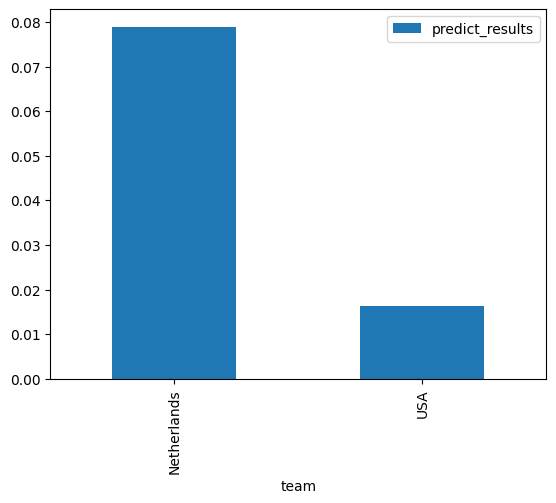

In [799]:
RoundOf16Game1_December3.reset_index().plot.bar(x="team", y="predict_results")

In [800]:
WinnersOfMatch49 = RoundOf16Game1_December3.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch49

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
7,2022-11-30 21:00:41 UTC,Netherlands,A,83.97368,2.48412,0.52493,2.0,1.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.65624,0.31321,0.11017,0.05378,2022-11-30 21:01:48 UTC,0.078834


In [801]:
frame2 = [dfCwinners, dfDRunners_up]
RoundOf16Game2_December3 = pd.concat(frame2)
RoundOf16Game2_December3

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2022-11-30 21:00:41 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,0.00000,1.00000,0.82636,0.51400,0.21433,0.11649,2022-11-30 21:01:48 UTC,0.083638
73,2022-11-24 20:56:17 UTC,Denmark,D,78.86992,2.17826,0.58510,0.76562,1.54234,0.69204,0.15956,...,0.41237,0.29935,0.13521,0.56544,0.32475,0.15557,0.05583,0.02290,2022-11-30 21:01:48 UTC,0.022665


<AxesSubplot: xlabel='team'>

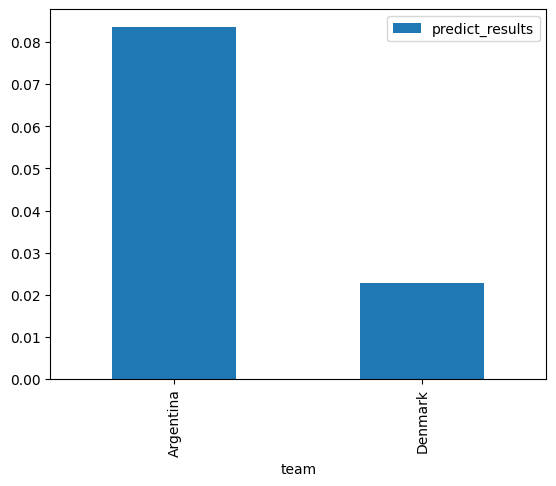

In [802]:
RoundOf16Game2_December3.reset_index().plot.bar(x="team", y="predict_results")

In [803]:
WinnersOfMatch50 = RoundOf16Game2_December3.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch50

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2022-11-30 21:00:41 UTC,Argentina,C,87.98006,2.61284,0.38151,2.0,0.0,1.0,3.0,...,0.0,0.0,0.0,1.0,0.82636,0.514,0.21433,0.11649,2022-11-30 21:01:48 UTC,0.083638


In [804]:
frame3 = [dfEwinners, dfFRunners_up]
RoundOf16Game1_December5 = pd.concat(frame3)
RoundOf16Game1_December5

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-11-30 21:00:41 UTC,Spain,E,90.62031,2.84092,0.33577,1.61182,1.24899,0.13919,8.04129,...,0.14309,0.00857,0.0,0.99143,0.72387,0.35347,0.22265,0.13230,2022-11-30 21:01:48 UTC,0.118350
11,2022-11-30 21:00:41 UTC,Morocco,F,74.98677,1.90939,0.57595,1.39552,1.31666,0.28782,2.21334,...,0.65419,0.08791,0.0,0.91209,0.27891,0.08576,0.03484,0.01198,2022-11-30 21:01:48 UTC,0.038345


<AxesSubplot: xlabel='team'>

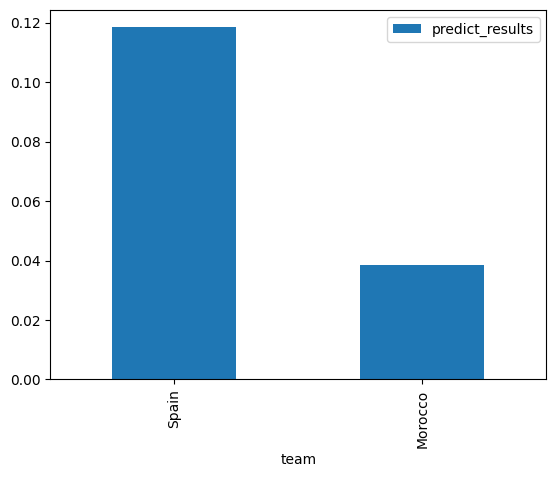

In [805]:
RoundOf16Game1_December5.reset_index().plot.bar(x="team", y="predict_results")

In [806]:
WinnersOfMatch53 = RoundOf16Game1_December5.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch53

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-11-30 21:00:41 UTC,Spain,E,90.62031,2.84092,0.33577,1.61182,1.24899,0.13919,8.04129,...,0.14309,0.00857,0.0,0.99143,0.72387,0.35347,0.22265,0.1323,2022-11-30 21:01:48 UTC,0.11835


In [807]:
frame4 = [dfGwinners, dfHRunners_up]
RoundOf16Game2_December5 = pd.concat(frame4)
RoundOf16Game2_December5

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-11-30 21:01:48 UTC,0.109779
118,2022-11-16 16:00:55 UTC,South Korea,H,66.12313,1.73414,0.81094,0.82649,0.85594,1.31757,-1.13309,...,0.23574,0.35148,0.29216,0.35636,0.10596,0.03783,0.01429,0.00449,2022-11-30 21:01:48 UTC,0.011812


<AxesSubplot: xlabel='team'>

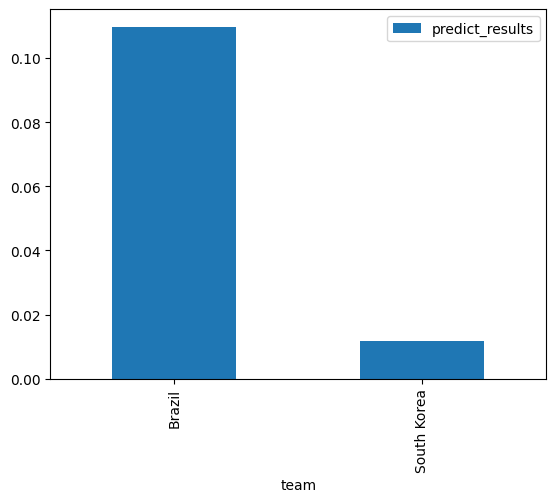

In [808]:
RoundOf16Game2_December5.reset_index().plot.bar(x="team", y="predict_results")

In [809]:
WinnersOfMatch54 = RoundOf16Game2_December5.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch54


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.2476,2022-11-30 21:01:48 UTC,0.109779


In [810]:
frame5 = [dfBwinners, dfARunners_up]
RoundOf16Game1_December4 = pd.concat(frame5)
RoundOf16Game1_December4

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
102,2022-11-16 16:00:55 UTC,England,B,85.95712,2.55300,0.45994,1.71265,0.79415,0.4932,2.62876,...,0.24981,0.12986,0.06588,0.80426,0.51608,0.28996,0.14689,0.07136,2022-11-30 21:01:48 UTC,0.073367
9,2022-11-30 21:00:41 UTC,Senegal,A,75.46857,2.00641,0.62177,2.00000,0.00000,1.0000,1.00000,...,1.00000,0.00000,0.00000,1.00000,0.31923,0.12165,0.04702,0.01450,2022-11-30 21:01:48 UTC,0.068638


<AxesSubplot: xlabel='team'>

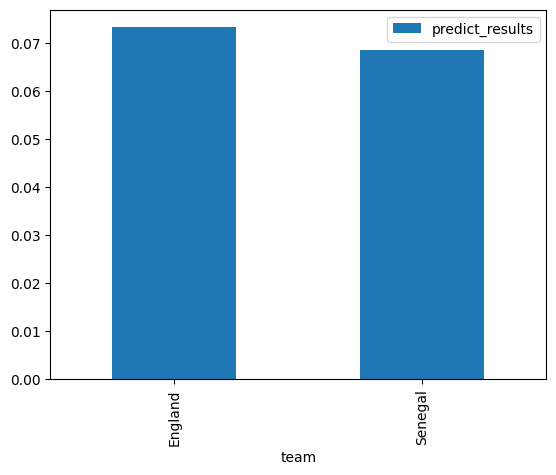

In [811]:
RoundOf16Game1_December4.reset_index().plot.bar(x="team", y="predict_results")

In [812]:
WinnersOfMatch51 = RoundOf16Game1_December4.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch51

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
102,2022-11-16 16:00:55 UTC,England,B,85.95712,2.553,0.45994,1.71265,0.79415,0.4932,2.62876,...,0.24981,0.12986,0.06588,0.80426,0.51608,0.28996,0.14689,0.07136,2022-11-30 21:01:48 UTC,0.073367


In [813]:
frame6 = [dfDwinners, dfCRunners_up]
RoundOf16Game2_December4 = pd.concat(frame6)
RoundOf16Game2_December4

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
66,2022-11-24 20:56:17 UTC,France,D,89.25241,2.94006,0.46965,2.13886,0.51836,0.34278,4.74748,...,0.16078,0.06439,0.00571,0.92990,0.65888,0.40349,0.22312,0.11092,2022-11-30 21:01:48 UTC,0.108541
80,2022-11-24 20:56:17 UTC,Mexico,C,73.47596,1.89685,0.63005,0.66514,1.59635,0.73851,-0.15316,...,0.22454,0.30673,0.26683,0.42644,0.17268,0.07517,0.02449,0.00897,2022-11-30 21:01:48 UTC,0.010252


<AxesSubplot: xlabel='team'>

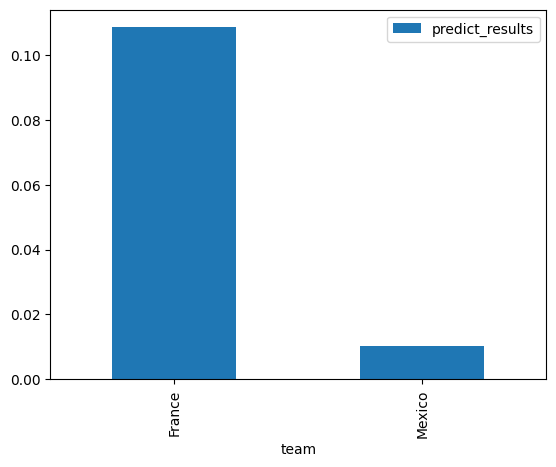

In [814]:
RoundOf16Game2_December4.reset_index().plot.bar(x="team", y="predict_results")


In [815]:
WinnersOfMatch52 = RoundOf16Game2_December4.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch52

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
66,2022-11-24 20:56:17 UTC,France,D,89.25241,2.94006,0.46965,2.13886,0.51836,0.34278,4.74748,...,0.16078,0.06439,0.00571,0.9299,0.65888,0.40349,0.22312,0.11092,2022-11-30 21:01:48 UTC,0.108541


In [816]:
frame7 = [dfFwinners, dfERunners_up]
RoundOf16Game1_December6 = pd.concat(frame7)
RoundOf16Game1_December6

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.23882,0.17162,0.04897,0.77941,0.34298,0.14180,0.06427,0.02415,2022-11-30 21:01:48 UTC,0.058560
71,2022-11-24 20:56:17 UTC,Germany,E,88.72557,3.21022,0.64270,1.08993,0.39472,1.51535,0.70256,...,0.29247,0.58851,0.08356,0.32793,0.21221,0.12057,0.06744,0.03269,2022-11-30 21:01:48 UTC,0.062697


<AxesSubplot: xlabel='team'>

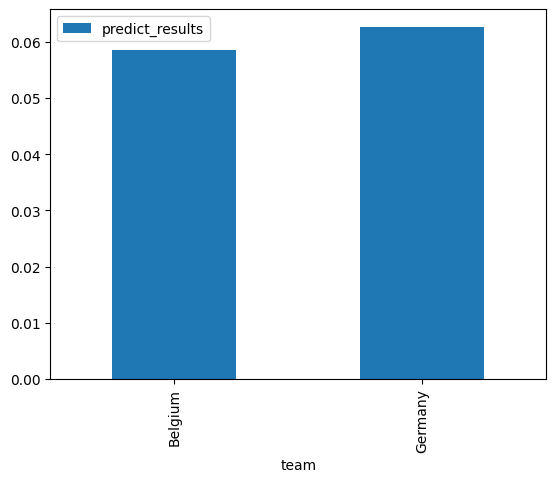

In [817]:
RoundOf16Game1_December6.reset_index().plot.bar(x="team", y="predict_results")

In [818]:
WinnersOfMatch55 = RoundOf16Game1_December6.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch55

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
71,2022-11-24 20:56:17 UTC,Germany,E,88.72557,3.21022,0.6427,1.08993,0.39472,1.51535,0.70256,...,0.29247,0.58851,0.08356,0.32793,0.21221,0.12057,0.06744,0.03269,2022-11-30 21:01:48 UTC,0.062697


In [819]:
frame8 = [dfHwinners, dfGRunners_up]
RoundOf16Game2_December6 = pd.concat(frame8)
RoundOf16Game2_December6

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-11-30 21:01:48 UTC,0.078915
108,2022-11-16 16:00:55 UTC,Switzerland,G,77.64665,2.23118,0.67527,1.01246,0.79286,1.19468,-0.49222,...,0.34406,0.30746,0.21393,0.47861,0.20741,0.08880,0.03948,0.01455,2022-11-30 21:01:48 UTC,0.036015


<AxesSubplot: xlabel='team'>

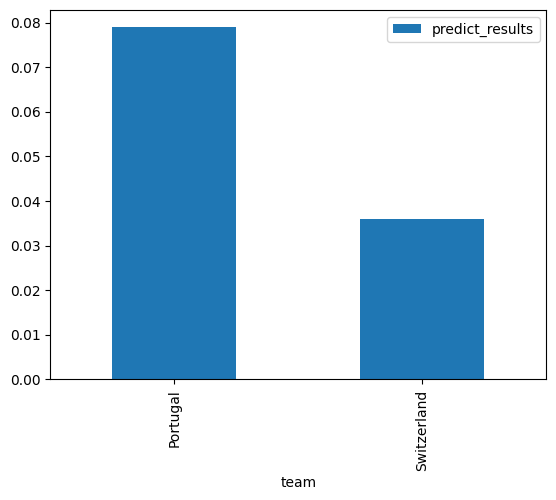

In [820]:
RoundOf16Game2_December6.reset_index().plot.bar(x="team", y="predict_results")

In [821]:
WinnersOfMatch56 = RoundOf16Game2_December6.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch56

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-11-30 21:01:48 UTC,0.078915


In [822]:
frame9 = [WinnersOfMatch49, WinnersOfMatch50]
QuaterFinalsGame1_December9 = pd.concat(frame9)
QuaterFinalsGame1_December9 

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
7,2022-11-30 21:00:41 UTC,Netherlands,A,83.97368,2.48412,0.52493,2.0,1.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.65624,0.31321,0.11017,0.05378,2022-11-30 21:01:48 UTC,0.078834
2,2022-11-30 21:00:41 UTC,Argentina,C,87.98006,2.61284,0.38151,2.0,0.0,1.0,3.0,...,0.0,0.0,0.0,1.0,0.82636,0.51400,0.21433,0.11649,2022-11-30 21:01:48 UTC,0.083638


<AxesSubplot: xlabel='team'>

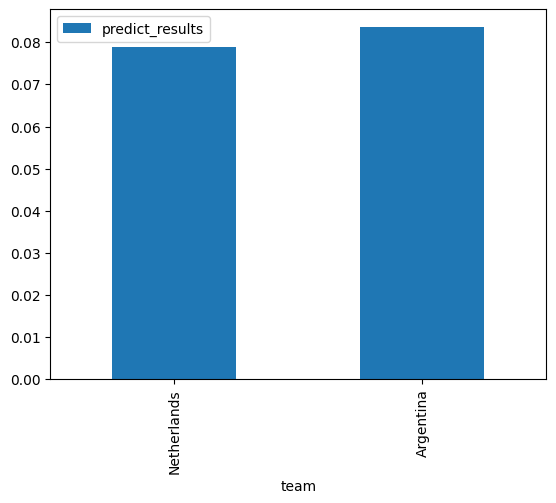

In [823]:
QuaterFinalsGame1_December9.reset_index().plot.bar(x="team", y="predict_results")

In [824]:
WinnersOfMatch57 = QuaterFinalsGame1_December9.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch57

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2022-11-30 21:00:41 UTC,Argentina,C,87.98006,2.61284,0.38151,2.0,0.0,1.0,3.0,...,0.0,0.0,0.0,1.0,0.82636,0.514,0.21433,0.11649,2022-11-30 21:01:48 UTC,0.083638


In [825]:
frame10 = [WinnersOfMatch53, WinnersOfMatch54]
QuaterFinalsGame2_December9 = pd.concat(frame10)
QuaterFinalsGame2_December9 

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-11-30 21:00:41 UTC,Spain,E,90.62031,2.84092,0.33577,1.61182,1.24899,0.13919,8.04129,...,0.14309,0.00857,0.00000,0.99143,0.72387,0.35347,0.22265,0.1323,2022-11-30 21:01:48 UTC,0.118350
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.2476,2022-11-30 21:01:48 UTC,0.109779


<AxesSubplot: xlabel='team'>

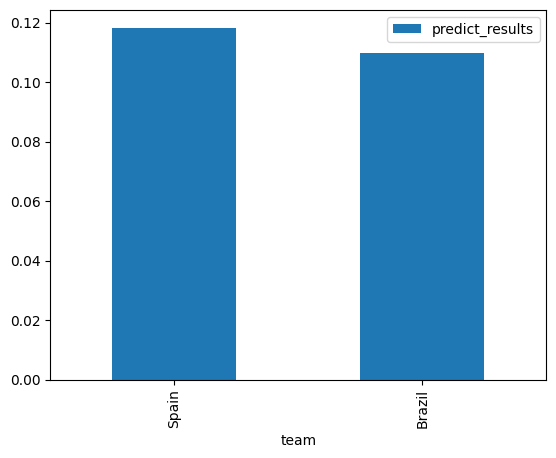

In [826]:
QuaterFinalsGame2_December9.reset_index().plot.bar(x="team", y="predict_results")

In [827]:
WinnersOfMatch58 = QuaterFinalsGame2_December9.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch58

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-11-30 21:00:41 UTC,Spain,E,90.62031,2.84092,0.33577,1.61182,1.24899,0.13919,8.04129,...,0.14309,0.00857,0.0,0.99143,0.72387,0.35347,0.22265,0.1323,2022-11-30 21:01:48 UTC,0.11835


In [828]:
frame11 = [WinnersOfMatch51, WinnersOfMatch52]
QuaterFinalsGame1_December10 = pd.concat(frame11)
QuaterFinalsGame1_December10

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
102,2022-11-16 16:00:55 UTC,England,B,85.95712,2.55300,0.45994,1.71265,0.79415,0.49320,2.62876,...,0.24981,0.12986,0.06588,0.80426,0.51608,0.28996,0.14689,0.07136,2022-11-30 21:01:48 UTC,0.073367
66,2022-11-24 20:56:17 UTC,France,D,89.25241,2.94006,0.46965,2.13886,0.51836,0.34278,4.74748,...,0.16078,0.06439,0.00571,0.92990,0.65888,0.40349,0.22312,0.11092,2022-11-30 21:01:48 UTC,0.108541


<AxesSubplot: xlabel='team'>

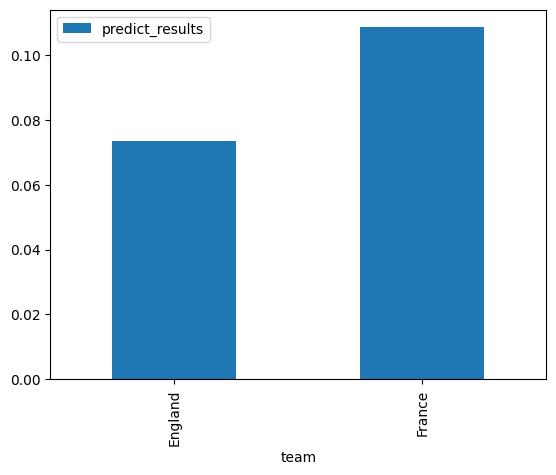

In [829]:
QuaterFinalsGame1_December10.reset_index().plot.bar(x="team", y="predict_results")


In [830]:
WinnersOfMatch59 = QuaterFinalsGame1_December10.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch59

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
66,2022-11-24 20:56:17 UTC,France,D,89.25241,2.94006,0.46965,2.13886,0.51836,0.34278,4.74748,...,0.16078,0.06439,0.00571,0.9299,0.65888,0.40349,0.22312,0.11092,2022-11-30 21:01:48 UTC,0.108541


In [831]:
frame12 = [WinnersOfMatch55, WinnersOfMatch56]
QuaterFinalsGame2_December10 = pd.concat(frame12)
QuaterFinalsGame2_December10

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
71,2022-11-24 20:56:17 UTC,Germany,E,88.72557,3.21022,0.64270,1.08993,0.39472,1.51535,0.70256,...,0.29247,0.58851,0.08356,0.32793,0.21221,0.12057,0.06744,0.03269,2022-11-30 21:01:48 UTC,0.062697
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-11-30 21:01:48 UTC,0.078915


<AxesSubplot: xlabel='team'>

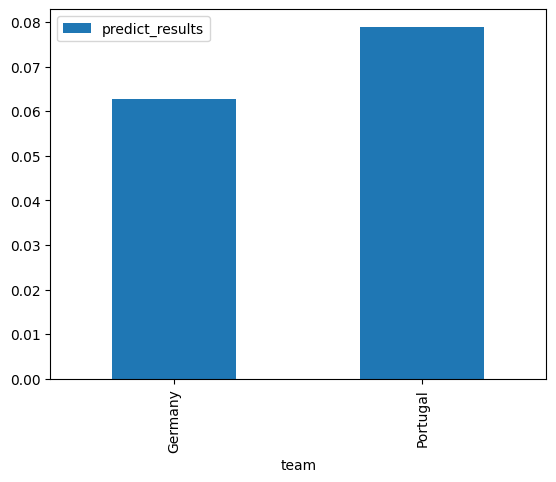

In [832]:
QuaterFinalsGame2_December10.reset_index().plot.bar(x="team", y="predict_results")

In [833]:
WinnersOfMatch60 = QuaterFinalsGame2_December10.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch60

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-11-30 21:01:48 UTC,0.078915


In [834]:
frame13 = [WinnersOfMatch57, WinnersOfMatch58]
SemiFinalsGame1_December13 = pd.concat(frame13)
SemiFinalsGame1_December13

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2022-11-30 21:00:41 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,0.0,1.00000,0.82636,0.51400,0.21433,0.11649,2022-11-30 21:01:48 UTC,0.083638
1,2022-11-30 21:00:41 UTC,Spain,E,90.62031,2.84092,0.33577,1.61182,1.24899,0.13919,8.04129,...,0.14309,0.00857,0.0,0.99143,0.72387,0.35347,0.22265,0.13230,2022-11-30 21:01:48 UTC,0.118350


<AxesSubplot: xlabel='team'>

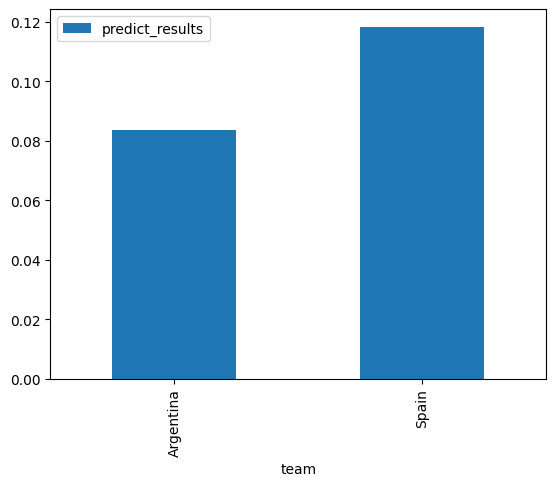

In [835]:
SemiFinalsGame1_December13.reset_index().plot.bar(x="team", y="predict_results")

In [836]:
WinnersOfMatch61 = SemiFinalsGame1_December13.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch61

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-11-30 21:00:41 UTC,Spain,E,90.62031,2.84092,0.33577,1.61182,1.24899,0.13919,8.04129,...,0.14309,0.00857,0.0,0.99143,0.72387,0.35347,0.22265,0.1323,2022-11-30 21:01:48 UTC,0.11835


In [837]:
frame14 = [WinnersOfMatch59, WinnersOfMatch60]
SemiFinalsGame1_December14 = pd.concat(frame14)
SemiFinalsGame1_December14

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
66,2022-11-24 20:56:17 UTC,France,D,89.25241,2.94006,0.46965,2.13886,0.51836,0.34278,4.74748,...,0.16078,0.06439,0.00571,0.92990,0.65888,0.40349,0.22312,0.11092,2022-11-30 21:01:48 UTC,0.108541
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-11-30 21:01:48 UTC,0.078915


<AxesSubplot: xlabel='team'>

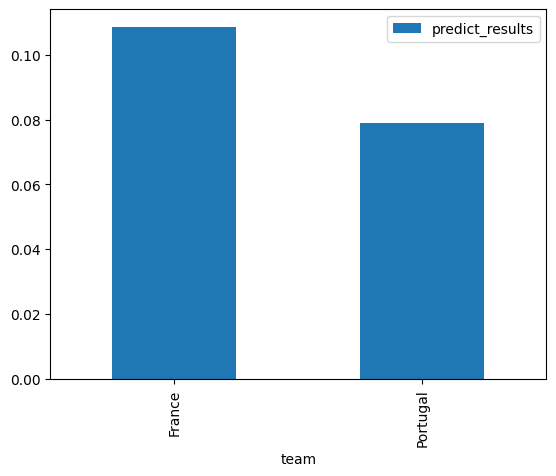

In [838]:
SemiFinalsGame1_December14.reset_index().plot.bar(x="team", y="predict_results")

In [839]:
WinnersOfMatch62 = SemiFinalsGame1_December14.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch62

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
66,2022-11-24 20:56:17 UTC,France,D,89.25241,2.94006,0.46965,2.13886,0.51836,0.34278,4.74748,...,0.16078,0.06439,0.00571,0.9299,0.65888,0.40349,0.22312,0.11092,2022-11-30 21:01:48 UTC,0.108541


In [840]:
frame15 = [WinnersOfMatch61, WinnersOfMatch62]
FinalGame1_December14 = pd.concat(frame15)
FinalGame1_December14

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-11-30 21:00:41 UTC,Spain,E,90.62031,2.84092,0.33577,1.61182,1.24899,0.13919,8.04129,...,0.14309,0.00857,0.00000,0.99143,0.72387,0.35347,0.22265,0.13230,2022-11-30 21:01:48 UTC,0.118350
66,2022-11-24 20:56:17 UTC,France,D,89.25241,2.94006,0.46965,2.13886,0.51836,0.34278,4.74748,...,0.16078,0.06439,0.00571,0.92990,0.65888,0.40349,0.22312,0.11092,2022-11-30 21:01:48 UTC,0.108541


<AxesSubplot: xlabel='team'>

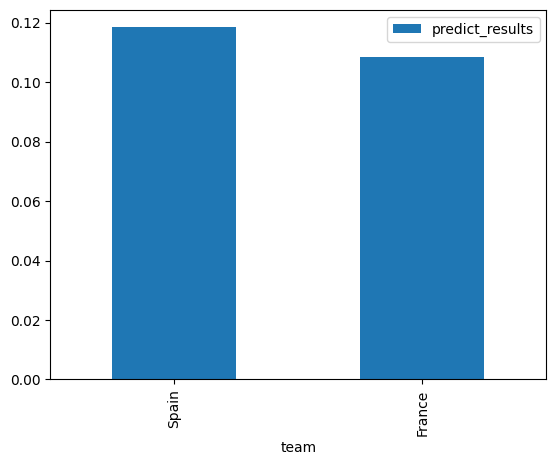

In [841]:
FinalGame1_December14.reset_index().plot.bar(x="team", y="predict_results")

In [842]:
WinnersOfFIFA2022WorldCup = FinalGame1_December14.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfFIFA2022WorldCup

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-11-30 21:00:41 UTC,Spain,E,90.62031,2.84092,0.33577,1.61182,1.24899,0.13919,8.04129,...,0.14309,0.00857,0.0,0.99143,0.72387,0.35347,0.22265,0.1323,2022-11-30 21:01:48 UTC,0.11835
